In [56]:
import pandas as pd

import scienceplots
import matplotlib.pyplot as plt
plt.style.use("science")

# PHOTOMETRY_CSV_PATH = "/home/ramon/uanl/Tesis/Backup Data/Gaia Epoch Photometry - Indiv/EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.csv"
PHOTOMETRY_CSV_PATH = "/home/ramon/uanl/Tesis/Backup Data/Gaia Epoch Photometry - Indiv/DR3/EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.ecsv"

import os
assert os.path.exists(PHOTOMETRY_CSV_PATH), f"{PHOTOMETRY_CSV_PATH} not found"

In [77]:
BAND_COLORS = {
	'G': 'green',
	'BP': 'blue',
	'RP': 'red'
}

def plotBand(source_id, vals, axsRow):
	axsRow[0].set_title(f"{source_id} Magnitude")
	axsRow[1].set_title(f"{source_id} Flux")

	for band in BAND_COLORS:
		filteredBand = vals[vals['band'] == band]
		axsRow[0].plot(filteredBand['time'], filteredBand['mag'], '.', label=f"{band}", color=BAND_COLORS[band])
		axsRow[1].plot(filteredBand['time'], filteredBand['flux'], '.', label=f"{band}", color=BAND_COLORS[band])
		
		axsRow[0].set_xlabel("BJD - 2455197.5 Days")
		axsRow[1].set_xlabel("BJD - 2455197.5 Days")
	
	axsRow[0].legend()

def plotBandMagnitude(source_id: str | float, vals: pd.Series, ax: plt.Axes) -> None:
	ax.set_title(f"{source_id} Magnitude", fontsize=16)

	for band in BAND_COLORS:
		filteredBand = vals[vals['band'] == band]
		ax.plot(filteredBand['time'], filteredBand['mag'], '.', label=f"{band}", color=BAND_COLORS[band])
		ax.set_xlabel("BJD - 2455197.5 Days", fontsize=13)
	
	ax.legend()
	

In [62]:
from astropy.table import Table

dataTable = Table.read(PHOTOMETRY_CSV_PATH)
df = dataTable.to_pandas()
df

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,1982536257931470464,15914106402149388,G,1684.645069,16.809998,3555.883734,13.240487,268.561401,False,False,1,375316653866487564
1,1982536257931470464,15923847240881531,G,1684.821236,16.808627,3560.378122,11.872833,299.876038,False,False,1,375316653866487564
2,1982536257931470464,15927939542726427,G,1684.895246,16.925122,3198.144064,14.858678,215.237457,False,False,1,375316653866487564
3,1982536257931470464,15937680367558820,G,1685.071412,16.899170,3275.507705,64.642659,50.670994,False,False,4097,375316653866487564
4,1982536257931470464,15941772663767622,G,1685.145395,16.775474,3670.768815,13.205851,277.965332,False,False,4194305,375316653866487564
...,...,...,...,...,...,...,...,...,...,...,...,...
208,1982536257931470464,68564649765818840,RP,2636.797157,16.107843,2857.728742,34.570173,82.664581,False,False,0,375316653866487564
209,1982536257931470464,68574390600082284,RP,2636.973312,16.210664,2599.517311,29.385957,88.461212,False,False,0,375316653866487564
210,1982536257931470464,68578482921453413,RP,2637.047319,16.354475,2277.026942,38.569154,59.037514,False,False,0,375316653866487564
211,1982536257931470464,71504440274863554,RP,2689.962995,16.131512,2796.104174,30.633779,91.275200,False,False,0,375316653866487564


In [63]:
from astropy.time import Time

df = df[(df['rejected_by_photometry'] == False) & (df['rejected_by_variability'] == False)].sort_values('time')

bjdTime = df['time'] + 2455197.5
t = Time(bjdTime, format='jd', scale='tdb')
t.format = 'fits'
t

<Time object: scale='tdb' format='fits' value=['2014-08-12T15:28:53.990' '2014-08-12T15:29:21.212'
 '2014-08-12T15:29:28.578' '2014-08-12T19:42:34.759'
 '2014-08-12T19:43:01.982' '2014-08-12T19:43:09.337'
 '2014-08-12T21:29:09.281' '2014-08-12T21:29:36.484'
 '2014-08-12T21:29:43.965' '2014-08-13T01:42:50.024'
 '2014-08-13T01:43:17.229' '2014-08-13T01:43:24.699'
 '2014-08-13T03:29:22.105' '2014-08-13T03:29:51.719'
 '2014-08-13T03:29:59.299' '2014-08-13T07:43:02.826'
 '2014-08-13T07:43:32.442' '2014-08-13T07:43:40.012'
 '2014-08-13T09:29:39.757' '2014-08-13T09:30:06.923'
 '2014-08-13T09:30:14.587' '2014-08-13T13:43:20.454'
 '2014-08-13T13:43:47.624' '2014-08-13T13:43:55.278'
 '2014-08-13T15:29:54.947' '2014-08-13T15:30:22.095'
 '2014-08-13T15:30:29.827' '2014-08-13T19:43:35.617'
 '2014-08-13T19:44:02.770' '2014-08-13T19:44:10.493'
 '2014-11-08T08:47:27.286' '2014-11-08T08:47:49.632'
 '2014-11-08T08:47:57.079' '2014-11-08T10:33:56.306'
 '2014-11-08T10:34:23.529' '2014-11-08T10:34:30.873'


[1982536257931470464]


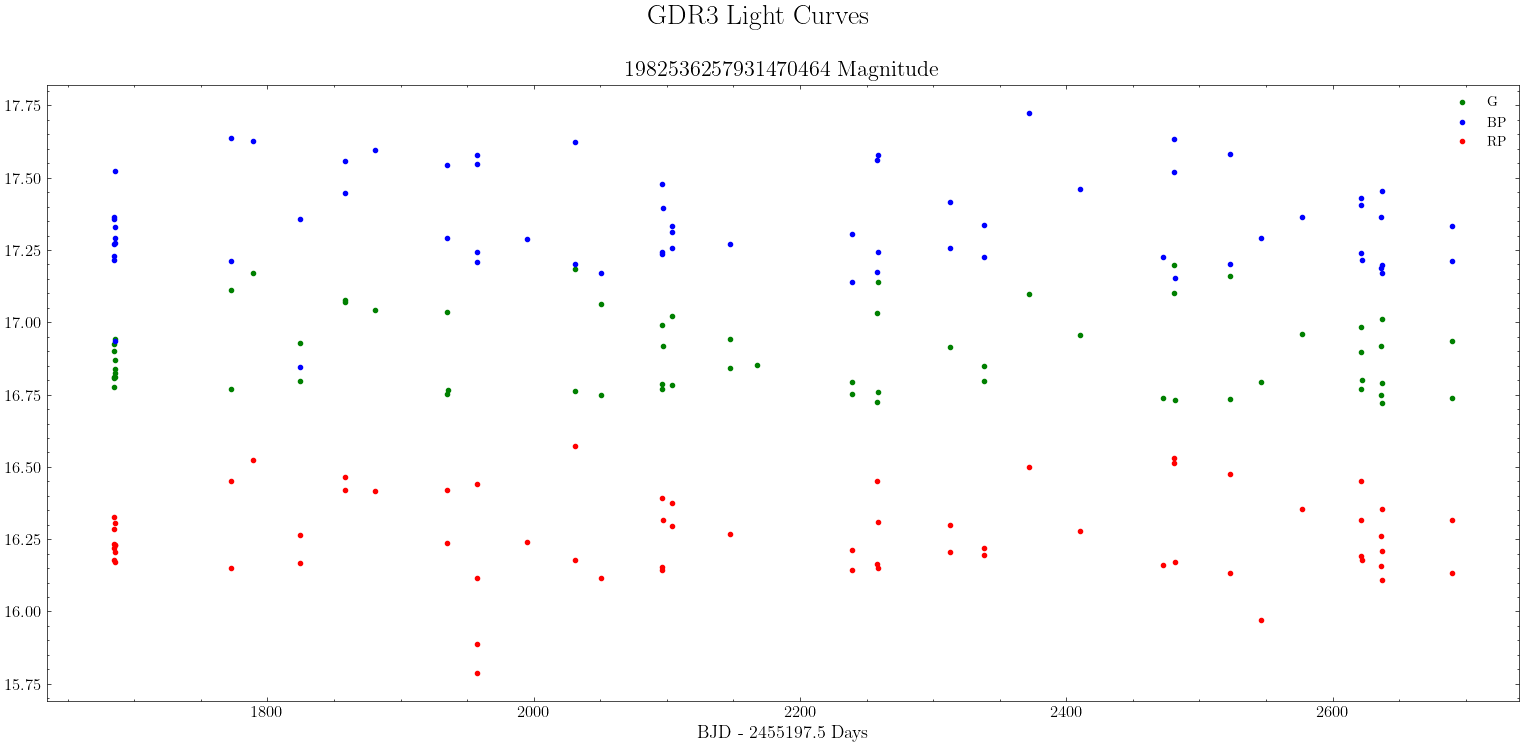

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,1982536257931470464,15914106402149388,G,1684.645069,16.809998,3555.883734,13.240487,268.561401,False,False,1,375316653866487564
71,1982536257931470464,15914106402149388,BP,1684.645384,17.272015,1685.043217,27.699104,60.833855,False,False,0,375316653866487564
142,1982536257931470464,15914106402149388,RP,1684.645470,16.233952,2544.352093,29.613897,85.917503,False,False,0,375316653866487564
1,1982536257931470464,15923847240881531,G,1684.821236,16.808627,3560.378122,11.872833,299.876038,False,False,1,375316653866487564
72,1982536257931470464,15923847240881531,BP,1684.821551,17.227759,1755.146053,30.346575,57.836708,False,False,0,375316653866487564
...,...,...,...,...,...,...,...,...,...,...,...,...
140,1982536257931470464,71504440274863554,BP,2689.962908,17.212278,1780.351382,31.166057,57.124691,False,False,0,375316653866487564
211,1982536257931470464,71504440274863554,RP,2689.962995,16.131512,2796.104174,30.633779,91.275200,False,False,0,375316653866487564
70,1982536257931470464,71508532541583929,G,2690.036603,16.936466,3164.902530,11.767778,268.946503,False,False,1,375316653866487564
141,1982536257931470464,71508532541583929,BP,2690.036918,17.333528,1592.229570,24.788830,64.231735,False,False,0,375316653866487564


In [80]:
%matplotlib inline

source_ids = df['source_id'].unique()
print(source_ids)

sourceIdCount = len(source_ids)

# fig, axs = plt.subplots(2, sourceIdCount, figsize=(19, 10))
fig, ax = plt.subplots(1, sourceIdCount, figsize=(19, 8))
fig.suptitle(f"GDR3 Light Curves", fontsize=20)

for i in range(sourceIdCount):
	source_id = source_ids[i]

	# axsRow: None
	# if sourceIdCount > 1:
	# 	axsRow = axs[i]
	# else:
	# 	axsRow = axs

	sourceVals = df[df['source_id'] == source_ids[i]]
	
	# plotBand(source_id, sourceVals, axsRow)
	plotBandMagnitude(source_id, sourceVals, ax)
	plt.xticks(fontsize=12)
	plt.yticks(fontsize=12)
	
plt.show()
df